# Testing the function of callbacks

## Importing libraries

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Loading dataset

In [3]:
housing = fetch_california_housing()

In [4]:
df_data = pd.DataFrame(housing.data, columns = housing.feature_names)

In [5]:
df_data['target'] = pd.Series(housing.target)

In [6]:
df_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Splitting the data

- We will be splitting the data into train, validation and test sets.

In [8]:
x = np.array(df_data.drop(columns = 'target', axis = 1))
y = np.array(df_data.target)

In [11]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

## Scaling the data

- Scaling the data using Standard Scaler

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

## Building the model

- The NN model will be having 2 hidden layers with 30 units each.

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation = 'relu', input_shape = [8]))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

- Loss function is mean squared error.
- Optimizer is SGD with a learning rate of 1e-3.

In [15]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

## Initializing callback

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('testing_callback_func.h5', save_best_only = True)

- We are introducing the filepath to the above file to save the checkpoints while training the model at certain frequency, default is after each epoch.
- The save_best_only argument set to true only overwrites the filepath when there is an increase in the validation score.

## Training the model

In [17]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.9921 - val_loss: 7.2872
Epoch 2/10
363/363 [==============================] - 0s 911us/step - loss: 0.8656 - val_loss: 0.8410
Epoch 3/10
363/363 [==============================] - 0s 920us/step - loss: 0.6846 - val_loss: 0.6465
Epoch 4/10
363/363 [==============================] - 0s 903us/step - loss: 0.6355 - val_loss: 0.6015
Epoch 5/10
363/363 [==============================] - 0s 910us/step - loss: 0.6047 - val_loss: 0.5741
Epoch 6/10
363/363 [==============================] - 0s 884us/step - loss: 0.5798 - val_loss: 0.5479
Epoch 7/10
363/363 [==============================] - 0s 898us/step - loss: 0.5581 - val_loss: 0.5287
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5390 - val_loss: 0.5069
Epoch 9/10
363/363 [==============================] - 0s 857us/step - loss: 0.5216 - val_loss: 0.4980
Epoch 10/10
363/363 [==============================] - 0s 885us/step - loss: 0.5062 - 

## Rollback to best model

In [18]:
model = keras.models.load_model('testing_callback_func.h5')

- Here we are rolling back to the best model generated in terms of validation score during training.

In [19]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 568us/step - loss: 0.4908


0.4908326268196106

## Early stopping callback

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation = 'relu', input_shape = [8]))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [31]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [32]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

In [33]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_valid, y_valid), callbacks = [checkpoint_cb, early_stopping_cb]) 

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 2.1408 - val_loss: 5.5723
Epoch 2/100
363/363 [==============================] - 0s 879us/step - loss: 0.8704 - val_loss: 0.7924
Epoch 3/100
363/363 [==============================] - 0s 905us/step - loss: 0.6788 - val_loss: 0.6377
Epoch 4/100
363/363 [==============================] - 0s 856us/step - loss: 0.6212 - val_loss: 0.6117
Epoch 5/100
363/363 [==============================] - 0s 854us/step - loss: 0.5875 - val_loss: 0.5838
Epoch 6/100
363/363 [==============================] - 0s 887us/step - loss: 0.5622 - val_loss: 0.5294
Epoch 7/100
363/363 [==============================] - 0s 931us/step - loss: 0.5411 - val_loss: 0.5222
Epoch 8/100
363/363 [==============================] - 0s 903us/step - loss: 0.5231 - val_loss: 0.5010
Epoch 9/100
363/363 [==============================] - 0s 914us/step - loss: 0.5077 - val_loss: 0.4898
Epoch 10/100
363/363 [==============================] - 0s 854us/step - los

- The model was stopped after 66 epoch as the callback func didnt find any increase in the val_loss after 10 epochs.

In [34]:
df_metrics = pd.DataFrame(history.history)

In [35]:
df_metrics.head()

,loss,val_loss
0,2.140760,5.572293
1,0.870395,0.792423
2,0.678835,0.637671
3,0.621247,0.611738
4,0.587457,0.583758


(0.0, 100.0, 0.0, 1.0)

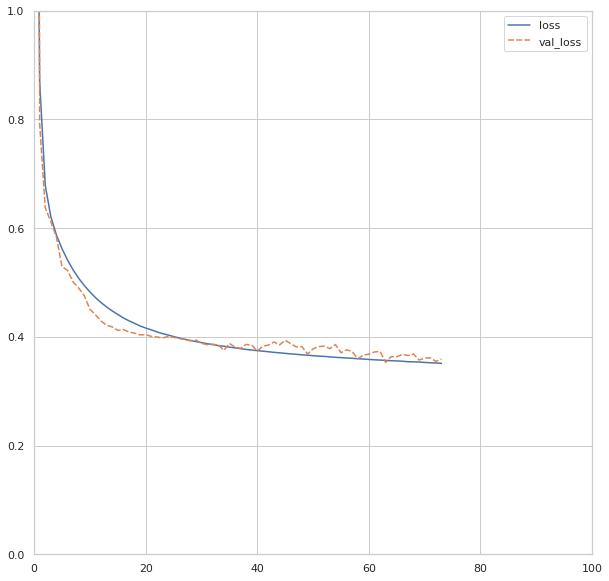

In [38]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
ax = sns.lineplot(data = df_metrics)
plt.axis([0, 100, 0, 1])

In [37]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 550us/step - loss: 0.3567


0.3566860556602478

## Custom callbacks

In [39]:
class print_val_train_ratio_callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

- We are using a custom callback function to print the ration betweem train and validation loss at the end of each epoch.

In [40]:
val_train_ratio_cb = print_val_train_ratio_callback()

In [42]:
history = model.fit(x_train, y_train, epochs = 1, validation_data = (x_valid, y_valid), callbacks = [val_train_ratio_cb])

285/363 [======================>.......] - ETA: 0s - loss: 0.3532
val/train: 1.02
363/363 [==============================] - 0s 914us/step - loss: 0.3563 - val_loss: 0.3641
